# Analyzing molecular dynamics simulations

Authors:
- Mareike Leja, 2020/21, Internship at [Volkamer Lab, Charité](https://volkamerlab.org/)
- David Schaller, 2020/21, [Volkamer Lab, Charité](https://volkamerlab.org/)
- Andrea Volkamer, 2021, [Volkamer Lab, Charité](https://volkamerlab.org/)

## Aim of this talktorial

In this talktorial, we will introduce methods for the analysis of molecular dynamics (MD) simulations. The introduced methods include animated visualization, structural alignment, RMSD calculation as well as selected atom distances and hydrogen bond analysis. 
Note, we will work with the simulation results (1ns, 100 frames) generated with talktorial T019 **(!note, add proper reference!)** on the EGFR kinase ([PDB:3POZ](https://www.rcsb.org/structure/3poz)) bound to inhibitor 03P. 

### Contents in *Theory*

- MD simulations
    - Application in the drug discovery process
    - Flexible vs. static structures
- Analyzing MD simulations
  - Visualization
  - RMSD
  - Hydrogen bond analysis

### Contents in *Practical*

- Load and visualize the system
- Alignment
- RMSD of protein and ligand
  - RMSD over time
  - RMSD between frames
- Interaction analysis
  - Atomic distances
  - Hydrogen bond analysis

### References

Theoretical Background:

- Review on the impact of MD simulations in drug discovery ([_J Med Chem_ (2016), **59**(9), 4035‐4061](https://doi.org/10.1021/acs.jmedchem.5b01684))
- Review on force fields ([_J Chem Inf Model_ (2018), **58**(3), 565-578](https://doi.org/10.1021/acs.jcim.8b00042))
- Review on Hydrogen Bonding ([_PLoS One._ (2010), **5(8)**, e12029](https://doi.org/10.1371%2Fjournal.pone.0012029))
- Guide to Molecular Interactions ([_J. Med. Chem._ 2010, **53(14)**, 5061-84](https://doi.org/10.1021/jm100112j))
- Wikipedia Article about ([Root-Mean-Square-Deviation](https://en.wikipedia.org/wiki/Root-mean-square_deviation))
- Repositories of [MDAnalysis](https://www.mdanalysis.org/) and [NGL View](https://github.com/arose/nglview)

## Theory

### MD simulations

### Application in the drug discovery process

Over the past decades, the interest in structure-based drug design has been growing. The development of faster algorithms and architectures employing GPUs paved the way for molecular dynamics (MD) simulations to become a routinely applied computational tool in the drug discovery process. One of the main assets of MD simulations is the more accurate estimation of the drug-target recognition and binding process. Nowadays, a diverse array of computational methods builds on top of MD simulations and provides tools for many challenges encountered during the process of designing, selecting and optimizing new drug candidates ([_J Med Chem._ 2016, **59(9)**, 4035-61](https://doi.org/10.1021/acs.jmedchem.5b01684)).

For more details on how to perform an MD simulation of a protein-ligand complex, please also refer to talktorial **T019**.

### Flexible vs. static structures

Static models of protein-ligand complexes, like X-ray structures, allow for evaluating the binding mode of a lead candidate, which can be used to systematically suggest the synthesis of novel analogs to improve affinity and physiochemical properties. However, static structures cannot explain all phenomena of drug-target binding, since the numerous interactions observed between ligand, target and surroundings (e.g. solvent and/or membrane) cannot be described solely by the enthalpy of the current equilibrium state of the system. 

In contrast, forcefield-based MD simulations  account for the structural flexibility of protein and ligand as well as for entropic contributions of drug binding. Thus, they allow for a more accurate estimation of binding affinity, the detection of conformational changes, the analysis of interaction geometries over time, and more ([_J Med Chem._ 2016, **59(9)**, 4035-61](https://doi.org/10.1021/acs.jmedchem.5b01684)).

### Analyzing MD simulations

Since this talktorial is meant as an introduction to MD simulation analysis, we will perform basic analysis steps that give a first insight into the field. 

The results of a standard MD simulation are commonly saved in two file types. 
* *Topology of the system*, which informs about the simulated system, i.e. a defined set of atoms connected via bonds. 
* *Positions of the atoms* over time

Loading both file types into a molecular visualization tool can be used to create an instance of the simulated system. In the below used MD analysis library (`MDAnalysis`), this system is called a *universe*.

#### Visualization

A universe containing an MD simulation can be visualized as a whole, usually including animations. They allow for observation of conformational changes, fluctuations and binding/unbinding processes with the bare eye. 

![Model](images/model.gif)

Fig. 1: Visualization of an exemplary MD simulation of adenylate kinase (AdK), taken from [NGL View Example](https://github.com/arose/nglview/blob/master/examples/mdanalysis.md).

#### RMSD

A more suffisticated method to track conformational changes is the calculation of the root-mean-square deviation (RMSD, [wikipedia](https://en.wikipedia.org/wiki/Root-mean-square_deviation_of_atomic_positions)). This method measures the deviation of atom positions compared to a reference set of atom positions. RMSD plots can be employed to depict the relative movement of whole proteins or their domains during folding or drug binding. Also, RMSD calculations can be used to compare computed docking configurations to known (i.e. crystallographic) binding poses to validate the docking protocol **(!note: need to add a proper reference to the docking talktorial!)**.

For two, usually superimposed, sets of atom coordinates v and w with n elements, the RMSD is defined as follows:

$$RMSD(v,w) = \frac{1}{n} \sum_{i=1}^n \|v_i - w_i\|²$$

To differentiate flexible and stable portions of a protein in simulations, one can use the root-mean-square fluctuation (RMSF) calculation instead, which allows for visualization of the fluctuation of residues from their mean structure.

#### Hydrogen bond analysis

Non-covalent interations like hydrogen bonds are key-players in the formation of a ligand-protein complex ([_PLoS One._ (2010), **5(8)**, e12029](https://doi.org/10.1371%2Fjournal.pone.0012029), [_J. Med. Chem._ 2010, **53(14)**, 5061-84](https://doi.org/10.1021/jm100112j)). Their attractive potential results from a partially positively charged hydrogen pointing to a partially negatively charged hydrogen bond acceptor atom, e.g. oxygen or nitrogen. The analysis of hydrogen bonds can give valuable insights into the stability of a ligand-protein complex and guide modification of a lead molecule to improve its activity. The strength of a hydrogen bond can be estimated by analyzing angles and distances between donor, hydrogen and acceptor atoms. A small distance and an angle close to 180° indicate a strong bond, while bigger distances and smaller angles point towards a weaker bond (Fig 2).

![H-Bonds](images/CADD_Hbonds.png)  
Fig. 2: Hydrogen Bond examples between a donor (red) and acceptor (blue) oxygen atom showing different bond angles and distances (arrows), created by *Mareike Leja, CADD Seminar 2020*

For computational analysis, geometric thresholds are often employed to determine which interactions can be considered a hydrogen bond: The distance between acceptor and hydrogen has to be less than or equal to a distance threshold and the angle between donor, hydrogen and acceptor needs to be greater than or equal to an angle threshold. For example, the Python Package __[MDAnalysis](https://www.mdanalysis.org/docs/documentation_pages/analysis/hbond_analysis.html)__, which we will use for analysis, sets the default maximum distance at 3 Å and the minimum angle at 120°.

## Practical

In the following, we will load an MD simulation and analyze the ligand and the protein over time. 

The MD simulation we analyze is a simulation performed in talktorial **T019**, which simulates the Epidermal Growth Factor Receptor (EGFR) kinase ([PDB:3POZ](https://www.rcsb.org/structure/3poz)) in complex with the inhibitor [03P](https://www.rcsb.org/ligand/03P). In total, the system was simulated for 100 ps and 100 shapshots (frames) were saved (files available here within the `data` folder for convenience). 

We will visualize the simulation and then perform a RMSD calculation and a (hydrogen) bond analysis. 

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nglview as nv
import MDAnalysis as mda
from MDAnalysis.analysis import rms, diffusionmap, align
from MDAnalysis.analysis.distances import dist
from MDAnalysis.analysis.hydrogenbonds.hbond_analysis import HydrogenBondAnalysis as HBA

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-ok688mgx because the default path (/home/andrea/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
HERE = Path(_dh[-1])
DATA = HERE / "data"

### Load and visualize the system

As the first step, we load the topology (`.pdb`) and the trajectory (`.xtc`) files to create an MDAnalysis `universe` representing the simulated system. 
The universe can easily be visualized in its entirety, including the animation of the trajectory. 

[NGL Viewer](http://nglviewer.org/) provides pre-build functions to visualize simulations loaded in common libraries such as MD Analysis.

In [3]:
md_universe = mda.Universe(str(DATA / "topology.pdb"), str(DATA / "trajectory.xtc"))
view = nv.show_mdanalysis(md_universe)
view

/home/andrea/.local/miniconda/envs/teachopencadd_review/lib/python3.8/site-packages/MDAnalysis/topology/base.py:203: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  residx = np.zeros_like(criteria[0], dtype=np.int)
/home/andrea/.local/miniconda/envs/teachopencadd_review/lib/python3.8/site-packages/MDAnalysis/topology/PDBParser.py:426: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use

NGLWidget(max_frame=99)

In [4]:
view.render_image(trim=True, factor=2, transparent=True);

In [5]:
view._display_image()

### Alignment

Although barely noticable in the visualization of this rather short trajectory, depending on the used simulation package/settings proteins can rotate and translate during simulation. This can complicate visual inspection of the trajectory and usually requires an alignment as as prior step to analysis. A common selection for aligning a trajectory on is the protein. Thus, the protein will not deviate from the center and not rotate allowing the observation of unbinding events or conformational changes. 

The [MDAnalysis](https://docs.mdanalysis.org/stable/index.html) framework allows for easy alignment on an atom selection using strings and has built-in simple selection keywords as well, for example "protein", which selects all residues usually belonging to the protein. 

In the next step, we will align the structures of the trajectory (mobile) onto the reference structure (the first frame is chosen as reference by default). 

In [6]:
# in_memory=True is needed to actually modify the loaded trajectory
# if the trajectory is too big for memory, one can write out the aligned trajectory and reload it into a new universe
alignment = align.AlignTraj(mobile=md_universe, reference=md_universe, select='protein', in_memory=True)
alignment.run()

In [7]:
view = nv.show_mdanalysis(md_universe)
view

NGLWidget(max_frame=99)

In [8]:
view.render_image(trim=True, factor=2, transparent=True);

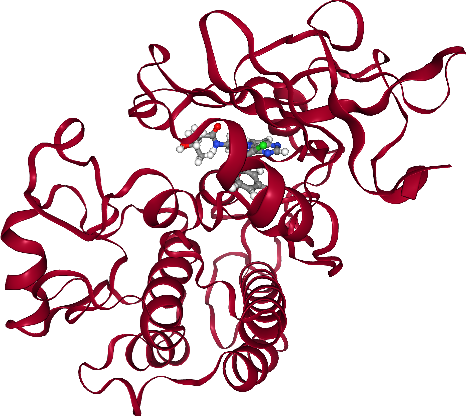

In [32]:
view._display_image()

### RMSD of protein and ligand

Protein and ligand are clearly distinguishable in the animation. However, it is hard to estimate if ligand or protein actually significantly change their position/conformation. Hence, we will evaluate the relative movement using a more suffisticated method, the calculation of the RMSD. We will thereby focus on different portions of the system (backbone, protein and ligand). The ligand is best selected by its distinct residue name. In this case, we know it is the inhibitor `03P`, but we could also find the name from either inspecting the topology file or hovering the cursor over a ligand atom in the animation above.

In [10]:
ligand_name = "03P"

#### RMSD over time

For plotting the RMSD, we write a function that does the RMSD calculation for selected atom groups from the universe and returns a pandas `Dataframe`.

In [11]:
def rmsd_for_atomgroups(universe, selection1, selection2=None):
    """ Calulate the RMSD for selected atom groups.
    
    Parameters
    ----------
    universe: MDAnalysis.core.universe.Universe
        MDAnalysis universe.
    selection1: str
        Selection string for main atom group, also used during alignment.
    selection2: list of str, optional
        Selection strings for additional atom groups.
    
    Returns
    -------
    rmsd_df: pandas.core.frame.DataFrame
        DataFrame containing RMSD of the selected atom groups over time.
    """
    
    universe.trajectory[0]
    ref = universe
    rmsd_analysis = rms.RMSD(universe, ref,
                             select=selection1, groupselections=selection2)
    rmsd_analysis.run()
    columns = [selection1, *selection2] if selection2 else [selection1]
    rmsd_df = pd.DataFrame(np.round(rmsd_analysis.rmsd[:, 2:],2),
                           columns=columns)
    rmsd_df.index.name = "frame"
    return rmsd_df

Run the function to calculate the RMSD for the selected molecules during the simulation:
* whole protein
* protein backbone atoms 
* and ligand

During the calculation, the molecule will be superimposed to the first frame (reference) along the backbone of the protein.

In [12]:
rmsd = rmsd_for_atomgroups(md_universe, "backbone", ["protein", "resname " + ligand_name])
rmsd.head()

/home/andrea/.local/miniconda/envs/teachopencadd_review/lib/python3.8/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)


,backbone,protein,resname 03P
frame,,,
0,0.00,0.00,0.00
1,0.83,1.12,1.72
2,0.96,1.28,1.62
3,0.99,1.36,1.57
4,1.03,1.44,1.51


Then, we plot the results.

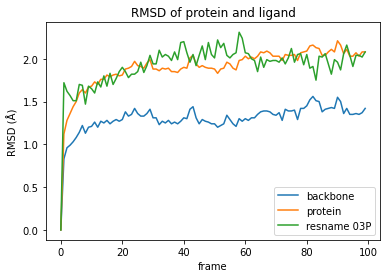

In [13]:
rmsd.plot(title="RMSD of protein and ligand")
plt.ylabel("RMSD (Å)");

What can we see in the plot:
* There are only slight conformational changes in the backbone during the simulation, which is not surprising since the protein was superimposed w.r.t. the backbone. 
* Including the protein side chains in RMSD calculation lead to more movement, when compared to the protein backbone only.
* The ligand, however, can move more freely and additionally to any conformational changes there might be directional movement involved, which is more likely the case if the RMSD values for the ligand are exceptionally high.

#### RMSD between frames

The plot before showed the distance at the given time compared to the initial state.
Now, we calculate the differences between all frames (pair-wise) and visualize them in a heatmap.

In [14]:
def RMSD_dist_frames(u, selection):
    """ Calculate the RMSD between all frames.
    
    Parameters
    ----------
    universe: MDAnalysis.core.universe.Universe
        MDAnalysis universe.
    selection: str
        Selection string for the atomgroup to be investigated, also used during alignment.
    
    Returns
    -------
    array: np.ndarray
        Numpy array of RMSD values.
    """
    
    align.AlignTraj(u, u, select=selection, in_memory=True).run()
    matrix = diffusionmap.DistanceMatrix(u, select=selection).run()
    return matrix.dist_matrix

First, we calculate the distance matrices for protein and ligand using the function above.
Then, we plot them side by side as heatmaps.

In [15]:
dist_matrix_protein = RMSD_dist_frames(md_universe, "protein")
dist_matrix_ligand = RMSD_dist_frames(md_universe, "resname " + ligand_name)

/home/andrea/.local/miniconda/envs/teachopencadd_review/lib/python3.8/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)


In order to achieve comparable heatmaps, it is important to set the minima and maxima in both plots to the same values. 
We set the minimal value to 0 and derive the upper bound from the distance matrices.

In [16]:
# get maximal distance between all frames
max_dist = max(np.amax(dist_matrix_ligand), np.amax(dist_matrix_protein))

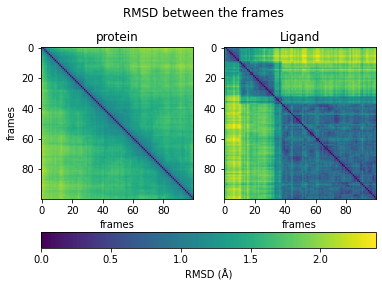

In [17]:
fig, ax = plt.subplots(1, 2)
fig.suptitle("RMSD between the frames")

# protein image
img1 = ax[0].imshow(dist_matrix_protein, cmap="viridis", vmin=0, vmax=max_dist)
ax[0].title.set_text("protein")
ax[0].set_xlabel("frames")
ax[0].set_ylabel("frames")

# ligand image
img2 = ax[1].imshow(dist_matrix_ligand, cmap="viridis", vmin=0, vmax=max_dist)
ax[1].title.set_text("Ligand")
ax[1].set_xlabel("frames")

fig.colorbar(img1, ax=ax, orientation="horizontal", fraction=.1, label="RMSD (Å)")

From the heatmaps, we can conclude that the protein moves constantly and evenly between the states. The ligand *jumps* between different states. Sometimes it can reach similar conformations repeatedly.

### Interaction analysis

Now, we will look at the interaction between protein and ligand. Let's visualize the system again, including some more detail in the binding pocket. All residues in a 5 Å radius around the ligand are shown with atoms and bonds visible.

In [18]:
# select pocket residues
pocket_resids = set(md_universe.select_atoms("(around 5 resname " + ligand_name + ") and protein").resids)
view2 = nv.show_mdanalysis(md_universe)
view2.add_representation("licorice", selection=f"protein and ({' '.join([str(x) for x in pocket_resids])})")
view2.center(selection='ligand')
view2

/home/andrea/.local/miniconda/envs/teachopencadd_review/lib/python3.8/site-packages/MDAnalysis/lib/distances.py:715: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  gridsearch = FastNS(max_cutoff, configuration, box=box)


NGLWidget(max_frame=99)

In [19]:
view2.render_image(trim=True, factor=2, transparent=True);

In [20]:
view2._display_image()

#### Atomic distances

We now zoom in and look for interactions that might of interest for a project at hand. In this example, we want to look at the backbone nitrogen of methionine 793 coming in close contact with an aromatic ring of the ligand. Theoretically, the distances can be calculated for groups of atoms, as long as each group has the same number of atoms, but we want to look at distances between single atoms.
Single atom selections can be done unambiguously with the combination of residue id and atom name inside that residue, which we note down for the atoms in the bond we wish to analyze.

In [21]:
protein_residue_id = "793"
protein_atom_name = "N"
ligand_id = "1"
ligand_atom_name = "N4"

We select the atom groups used for our analysis, which will contain one atom each in this example.

In [22]:
atomgroup_protein = md_universe.select_atoms(f"resid {protein_residue_id} and name {protein_atom_name}")
atomgroup_ligand = md_universe.select_atoms(f"resid {ligand_id} and name {ligand_atom_name}")

/home/andrea/.local/miniconda/envs/teachopencadd_review/lib/python3.8/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)


Now, we can calculate the distance between the atoms in the currently set frame of our universe (using the `dist`function from `MDAnalysis`).
The function returns an array of arrays: The first two elements are the residue ids, but we are only interested in the third entry, the distance.

In [23]:
distance = dist(atomgroup_protein, atomgroup_ligand)
print(f"The distance between residues {protein_residue_id} and {ligand_id} is {distance[2][0]:.2f} Å")

The distance between residues 793 and 1 is 3.52 Å


Since we are more interested in observing the distance over time, we can iterate over the frames and calculate the distance for each of them.

In [24]:
distances = []
for _ in md_universe.trajectory:
    distance = dist(atomgroup_protein, atomgroup_ligand)
    distances.append(distance[2][0])

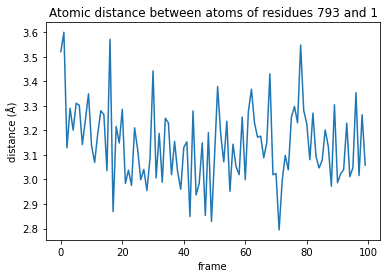

In [25]:
plt.plot(distances)
plt.ylabel('distance (Å)')
plt.xlabel('frame')
plt.title(f"Atomic distance between atoms of residues {protein_residue_id} and {ligand_id}")
plt.show()

#### Hydrogen bond analysis

The interaction between the ligand and the backbone nitrogen of methionine 793 we analyzed is actually a well known hydrogen bond with the hinge region in many kinases. The nitrogen of the backbone from methionine is acting as the donor, the nitrogen in the aromatic ring of the ligand is the acceptor.

We go back to the visualization to get the unique name of the hydrogen forming the bond .Then, we can use the hydrogen bond analysis capability from [MDAnalysis](https://docs.mdanalysis.org/1.0.0/documentation_pages/analysis/hydrogenbonds.html) to determine the characteristic distances and angles for the hydrogen bond. The hydrogen bond analysis covers all frames without manual iteration and is convenient to plot.

In [26]:
hydrogen_name = "H"

In [27]:
def run_hydrogenbond_analysis(universe, donor_resid, donor_atom, hydrogen_atom, acceptor_resid, acceptor_atom,
                              h_cutoff=1.2, a_cutoff=3.0, angle_cutoff=120):
    
    """ Perform an hydrogen bond analysis between selcted atom groups.
    Return the data as readable, formatted data frame.
    
    Parameters
    ----------
    universe: MDAnalysis.core.universe.Universe
        MDAnalysis universe.
    donor_resid: str
        Residue Id of residue containing donor atom in MDAnalysis universe.
    donor_atom: str
        Name of the donor atom in the MDAnalysis universe.
    hydrogen_atom: str
        Name of involved hydrogen atom in the MDAnalysis universe.
    acceptor_resid: str
        Residue Id of residue containing acceptor atom in the MDAnalysis universe.
    acceptor_atom: str
        Name of the acceptor atom in the MDAnalysis universe.
    h_cutoff: float, optional
        Distance cutoff used for finding donor-hydrogen pairs.
    a_cutoff: float, optional
        Donor-acceptor distance cutoff for hydrogen bonds.
    angle_cutoff: int, optional
        D-H-A angle cutoff for hydrogen bonds.
    
    Returns
    -------
    bond : pandas.core.frame.DataFrame
        DataFrame containing hydrogen bond information over time.
    """
    
    # set up and run the hydrogen bond analysis (HBA)
    hbonds = HBA(universe=universe,
                 donors_sel="resid " + donor_resid + " and name " + donor_atom,
                 hydrogens_sel="resid " + donor_resid + " and name " + hydrogen_atom,
                 acceptors_sel="resid " + acceptor_resid + " and name " + acceptor_atom,
                 d_h_cutoff=h_cutoff,
                 d_a_cutoff=a_cutoff,
                 d_h_a_angle_cutoff=angle_cutoff)
    hbonds.run()
    # extract bond data
    bond = pd.DataFrame(np.round(hbonds.hbonds,2)) 
    # name columns (according to MDAnalysis function description)
    bond.columns = ["frame", "donor_index", "hydrogen_index",
                    "acceptor_index", "distance", "angle"]
    # set frame as the index
    bond['frame'] = bond['frame'].astype(int)
    bond.set_index("frame", inplace=True, drop=True)
    return bond

We run the hydrogen bond analysis using our function, which returns a data frame.

In [28]:
bond = run_hydrogenbond_analysis(
    md_universe, protein_residue_id, protein_atom_name, hydrogen_name,
    ligand_id, ligand_atom_name)
bond.head()

,donor_index,hydrogen_index,acceptor_index,distance,angle
frame,,,,,
17,1483.0,1484.0,5529.0,2.87,144.73
21,1483.0,1484.0,5529.0,2.98,162.87
23,1483.0,1484.0,5529.0,2.98,173.41
26,1483.0,1484.0,5529.0,3.00,175.31
28,1483.0,1484.0,5529.0,2.95,163.73


In the table, we can see that the bond is only recognized in some frames during the simulation. 

The used module searches for hydrogen bonds with strict predefined constraints. Using default settings, the bond is only detected if the distance larger than 3Å between donor and acceptor and smaller than 1.2Å between donor and hydrogen and if the angle is larger than 120° (see Figure 1). The bond will not be included for frames that do not meet the constraints.

To trace the bond over the entire simulation, we can change those thresholds to detect the bond in its "weaker" states.
From the above table, the angles seem to be sufficiently high, while the distances are closer to the 3Å cutoff distance. Thus, we try the analysis again with a higher distance cutoff of 5Å for the donor and acceptor distance.

In [29]:
bond = run_hydrogenbond_analysis(
    md_universe, protein_residue_id, protein_atom_name, hydrogen_name,
    ligand_id, ligand_atom_name, a_cutoff=5.0)
bond.head()

/home/andrea/.local/miniconda/envs/teachopencadd_review/lib/python3.8/site-packages/MDAnalysis/core/selection.py:521: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros(len(group), dtype=np.bool)


,donor_index,hydrogen_index,acceptor_index,distance,angle
frame,,,,,
0,1483.0,1484.0,5529.0,3.52,166.39
1,1483.0,1484.0,5529.0,3.60,145.63
2,1483.0,1484.0,5529.0,3.13,173.95
3,1483.0,1484.0,5529.0,3.29,151.99
4,1483.0,1484.0,5529.0,3.20,170.21


Now, we plot the bond.

In [30]:
def plot_hydrogen_bond_over_time(bond):
    
    """ Plot the distance and degree of a chosen hydrogen bond over time.
    Peaks in angle and dips in distance represent moments of strong binding.
    
    Parameters
    ----------
    bond: pandas.core.frame.DataFrame
        Hydrogen bond analysis data frame with named columns.
    """
    
    donor_index = bond.iloc[0].donor_index
    acceptor_index = bond.iloc[0].acceptor_index
    
    # add values for missing frames for gapless plotting
    bond = bond.reindex(np.arange(0,99))

    # plot the data
    fig = plt.figure()
    distance = bond.distance.plot(
        title = f'H-Bond between donor {donor_index} and acceptor {acceptor_index}',
        style='o-', x="frame")
    distance.set_ylabel('distance (Å)')
    distance.set_xlabel('frame')
    angle = bond.angle.plot(secondary_y=True, style='o-', x="frame")
    angle.set_ylabel('angle (°)')
    angle.set_xlabel('frame')
    fig.legend(loc='upper right', bbox_to_anchor=(1, 1),
           bbox_transform=distance.transAxes)
    plt.show()

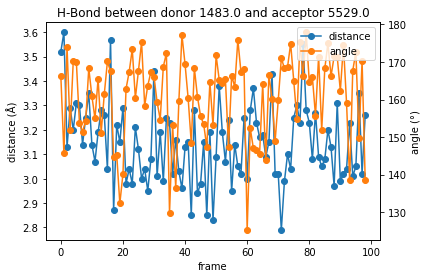

In [31]:
plot_hydrogen_bond_over_time(bond)

## Discussion

There are various ways to analyze MD Simulations. In this talktorial, we explored only a small fraction of available methods to give the user first insights. Some methods are more straightforward, like the visualization of the system or the calculation of the RMSD, while others require more finesse. Especially the hydrogen bond analysis is yet dependent on manual input and tweaking. But with further advancements in the field, we can expect the frameworks to become more and more refined.

The MD simulation used during analysis is actually too short to provide statistical significant data on binding and unbinding events or even conformational changes of the protein or ligand. To make full use of the capabilities of MD simulations one needs access to high performance clusters. Great examples on insights gained from MD simulations can be found on the webpage of the [folding@home](https://foldingathome.org/) consortium, which connects computers world wide to address pressing scientific challenges.

## Quiz

- Which hydrogen bond would you consider the strongest?
    - A: donor acceptor distance - 3.5 A, donor hydogen acceptor angle - 180 °
    - B: donor acceptor distance - 2.7 A, donor hydogen acceptor angle - 170 °
    - C: donor acceptor distance - 3.2 A, donor hydogen acceptor angle - 150 °
- Try to align the trajectory on the ligand. How does this affect the RMSD plots?
- Choose a second pair of atoms and analyse the interactions.
- Are you able to implement a function to calculate the root mean square fluctuations (RMSF) of protein residues?